In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
data_startup=pd.read_csv('data/50_Startups.csv')

In [50]:
data_startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
data_startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [52]:
data_startup[['R&D Spend','Administration','Marketing Spend','Profit']]=data_startup[['R&D Spend','Administration','Marketing Spend','Profit']].astype(int)

In [53]:
data_startup.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349,136897,471784,New York,192261
1,162597,151377,443898,California,191792
2,153441,101145,407934,Florida,191050
3,144372,118671,383199,New York,182901
4,142107,91391,366168,Florida,166187


In [54]:
#[Matrix]#Independent Variable 'R&D Spend','Administration','Marketing Spend',State
#{Vector}#Dependent Variable : Profit

In [55]:
X=data_startup.iloc[:,:-1].values
y=data_startup.iloc[:,4].values

In [56]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [57]:
labelencoder_X=LabelEncoder()
X[:,3]=labelencoder_X.fit_transform(X[:,3])
onehotencoder=OneHotEncoder(categorical_features=[3])

In [58]:
X=onehotencoder.fit_transform(X).toarray()

In [59]:
from sklearn.cross_validation import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
regressor=LinearRegression()

In [63]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
#Predicting the test set results

In [65]:
y_pred=regressor.predict(X_test)

In [66]:
diff=y_pred.astype(int)-y_test

In [67]:
y_train.shape

(40,)

ValueError: x and y must be the same size

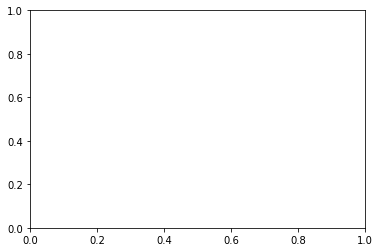

In [68]:
plt.scatter(X_test,y_test,color='red')